In [1]:
##PREDICTING HEART DISEASE USING MACHINE LEARNING

In [3]:
##PREPARING THE TOOLS
##importing all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##import models from sklearn
##We will be using a linear model fro classification, we have 3 options
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##Now we import the tools we will be using for model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [5]:
##LOADING THE DATA
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [6]:
##EXPLOARTION DATA ANALYSIS
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


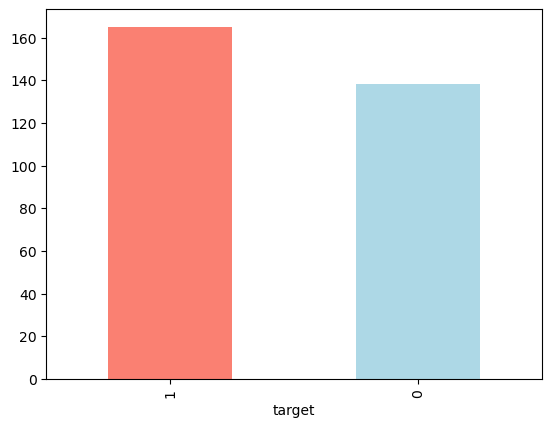

In [8]:
df["target"].value_counts().plot(kind="bar", color =["salmon", "lightblue"]);

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
##CHECKING FOR PATTERNS
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

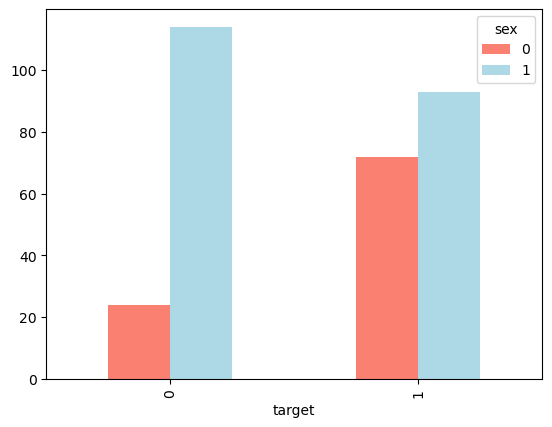

In [11]:
##heart disease frequency according to sex
pd.crosstab(df.target, df.sex).plot(kind="bar", color =["salmon", "lightblue"]);

In [12]:
##finding patterns again
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
##IN OUR DATA, TARGET IS THE DEPENDANT VARIABLE AND ALL OTHERS ARE INDEPENDANT VARIABLES
#building a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


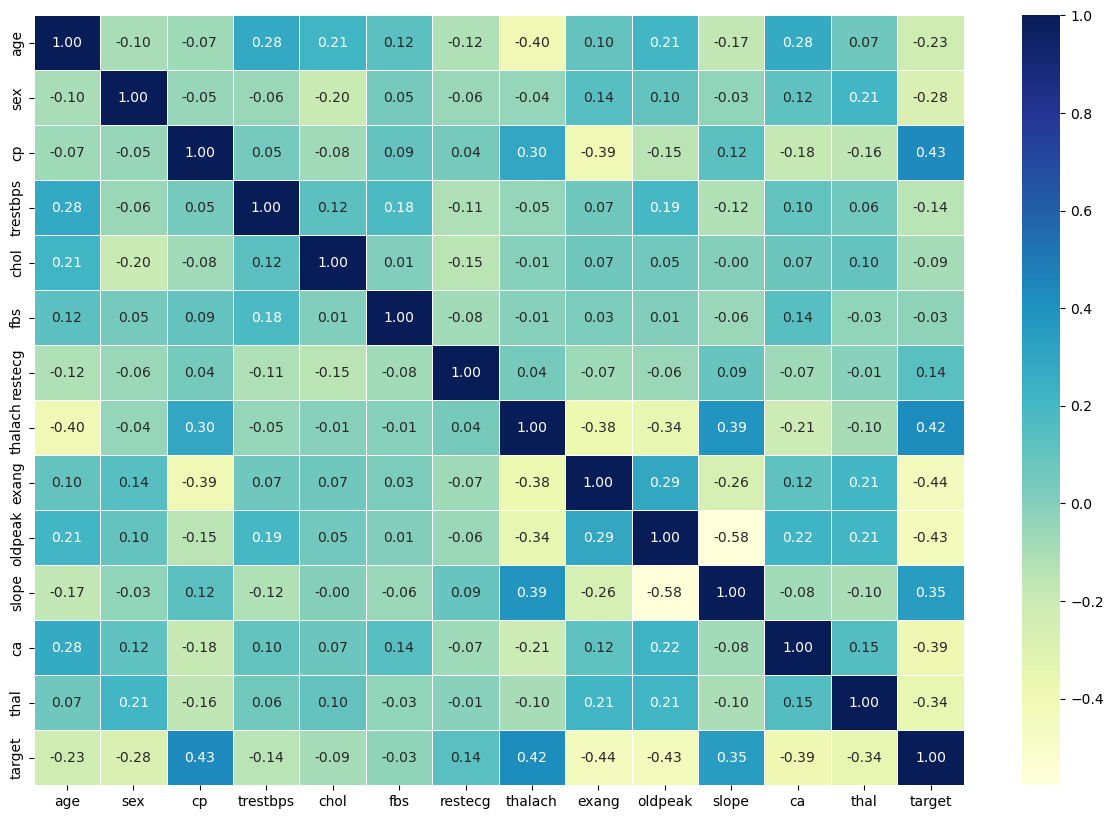

In [17]:
##let us use a confusion matrix to clarify what is actually happening here
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10));
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt =".2f", cmap ="YlGnBu");

In [18]:
##NOW WE WILL JUST USE THE INDEPENDANT VARIABLES TO PREDICT THE TARGET
#Split the data into X and Y
X = df.drop("target", axis = 1)
y = df["target"]

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
##Splitting the data into training and testing
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
#WE ARE GOING TO TRY 3 DIFFERENT MODELS: LogisticRegression, KNeighborsClassifier and RandomForestClassifier
#Put models in a dictionary

models ={
    "Logistic Regression":LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

##Create a fucntion to fit amd score the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Function to fit and train the models we have stated above using the training and testing data
    """
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [23]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

E:\AI-ML\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

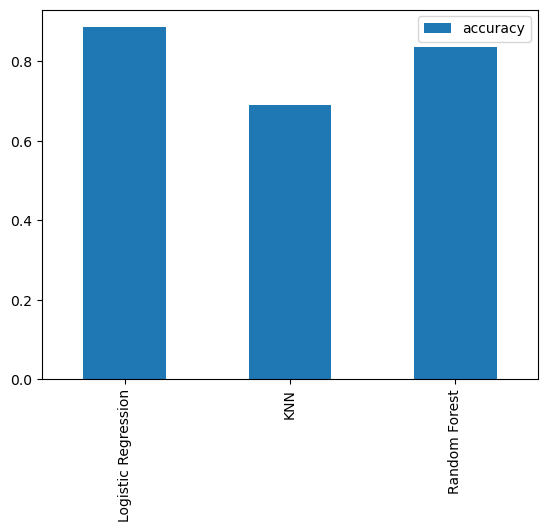

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"]);
model_compare.T.plot.bar();

In [29]:
##HYPERPARAMETER TUNING, 
##Since KNN ahd the lowest we will try to improve that firts
##Tuning and improving for KNeighborsClassifier

train_scores = []
test_scores = []

##Create a list of different values for N neighbors
neighbors = range(1, 21)

##Set up KNN instance
knn = KNeighborsClassifier()

##Loop through different n neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    ##Fit the algorithm
    knn.fit(X_train, y_train)

    #Append the training scores
    train_scores.append(knn.score(X_train, y_train))

    ##Append the testing scores
    test_scores.append(knn.score(X_test, y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score of the knn model: 0.7540983606557377


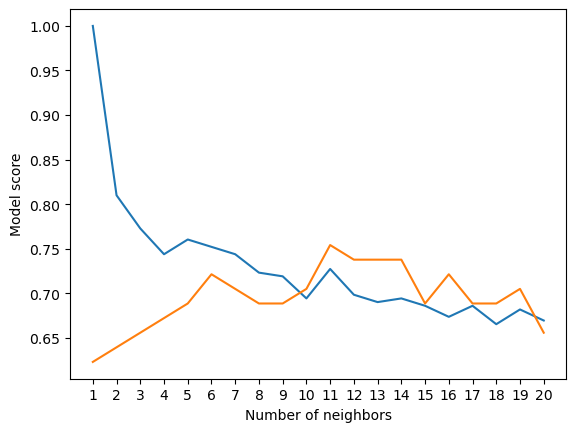

In [32]:
##Let's plot this data to see how our model did after the tuning
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))

print(f"Maximum score of the knn model: {max(test_scores)}")

In [33]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [34]:
##SINCE THE KNN MODEL COULD NOT RACH THE TEST SCORE OF THE OTHER TWO MODELS EVEN AFTER TUNING WE WILL NOW MOVE ONTO THE OTHER TWO MODELS

In [35]:
##HYPERPARAMTERE TUNING USING RANDOMIZEDSEARCHCV

In [36]:
#We are going tune logisticRegression and RandomForest Classifier using randomizedSearchCV

In [37]:
##USING RANDOMIZED_SEARCHCV REQUIRES GRIDS WITH PARAMETERS THAT HAVE BEEN TUNED

In [38]:
##Create a hyperparameter grid for logisticRegression
log_reg_grid = {
    "C":np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

##Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [39]:
##NOW WE HAVE THE HYPERPARAMETER GRIDS FOR THE MODESL NOW LET'S TUNE THEM SUING RANDOMIZEDSEARCHCV

In [41]:
np.random.seed(42)

#Set up hyperparameter search fro logisticregression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = log_reg_grid,
    cv = 5,
    n_iter = 20,
    verbose = True
)

##Fit the hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [45]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [48]:
##NOW WE WILL TRYRANDOMFORESTCLASSIFIER
np.random.seed(42)

#Set up hyperparameter search fro logisticregression
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = rf_grid,
    cv = 5,
    n_iter = 20,
    verbose = True
)

##Fit the hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [50]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [51]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [52]:
##THERE WAS AN IMPROVEMENT FOR RANDOMFOREST BUT LOGISTIC REGRESSION IS STILL BETTER

In [53]:
###WE HAVE FOUND THAT LOGISTICCREGRESSION GAVE US THE BEST RESULTS AFTER ALL THE ATTEMPTS SO NOW WE WILL TRY TO TUNE THAT MODE USING GRID SEARHC CV IT IS THE SMA PROCESS

In [57]:
#Different hyperparameters for logisiticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

##Set up grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv = 5,
    verbose=True
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [58]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [60]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [61]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [62]:
##Thats it then thats the best model for classification for heart_disease that we could find

In [63]:
##NIW WE WILL EVALUATE OUR MODEL..
##WE WILL MAKE PREDICTIONS SUING OUR TUNED MODEL

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

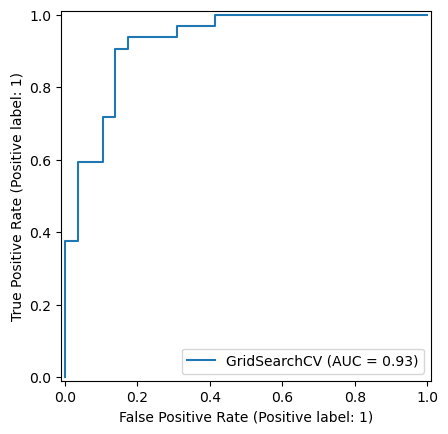

In [66]:
#1. ROC CURVE AND AUC SCORE
RocCurveDisplay.from_estimator(estimator = gs_log_reg, X=X_test,y=y_test);

In [65]:
##2.Confusion Matrix

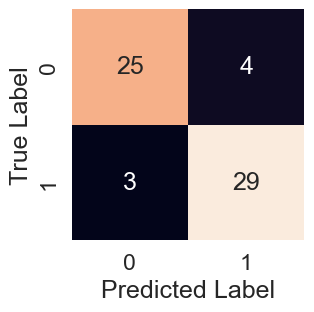

In [67]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(
        confusion_matrix(y_test, y_preds),
        annot=True,
        cbar=False
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [68]:
##CLASSIFICATION AND CROSS VALIDATION

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [70]:
##EVALUATION METRICS USING CROSS VALIDATION

In [71]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [75]:
##let us try to create a new classifier with the best parameters
clf = LogisticRegression(
    C = 0.20433597178569418, 
    solver ="liblinear"
)

In [77]:
##cross validated values'
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [78]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [79]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [80]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

<Axes: title={'center': 'Cross Validation Metrics Data'}>

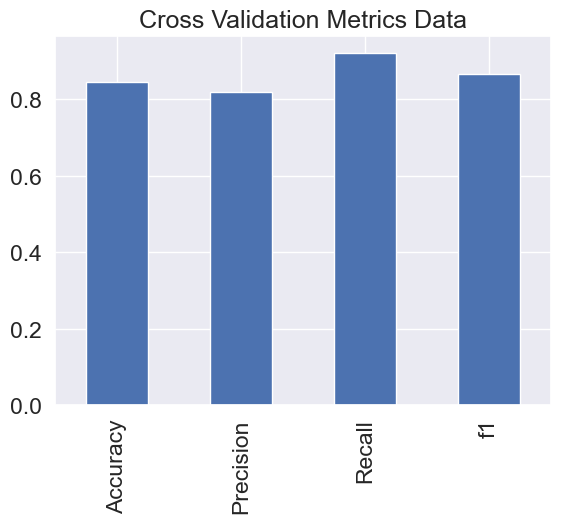

In [81]:
##Visulaizing the data:

cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
}, index = [0])

cv_metrics.T.plot.bar(title = "Cross Validation Metrics Data", legend=False)

In [82]:
##FEATURES IMPORTANCE
#esting the new doel again
##let us try to create a new classifier with the best parameters
clf = LogisticRegression(
    C = 0.20433597178569418, 
    solver ="liblinear"
)

In [85]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [86]:
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [87]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [88]:
feature_dict

{'age': np.float64(0.0031672769574500135),
 'sex': np.float64(-0.8604461876509621),
 'cp': np.float64(0.6606705956911073),
 'trestbps': np.float64(-0.011569931563712749),
 'chol': np.float64(-0.0016637424209784567),
 'fbs': np.float64(0.04386123481544026),
 'restecg': np.float64(0.3127581278171948),
 'thalach': np.float64(0.02459361107844528),
 'exang': np.float64(-0.6041306062020464),
 'oldpeak': np.float64(-0.5686283181245352),
 'slope': np.float64(0.4505162370054866),
 'ca': np.float64(-0.6360987949056705),
 'thal': np.float64(-0.6766338344951353)}

<Axes: title={'center': 'Feature Importance visulization'}>

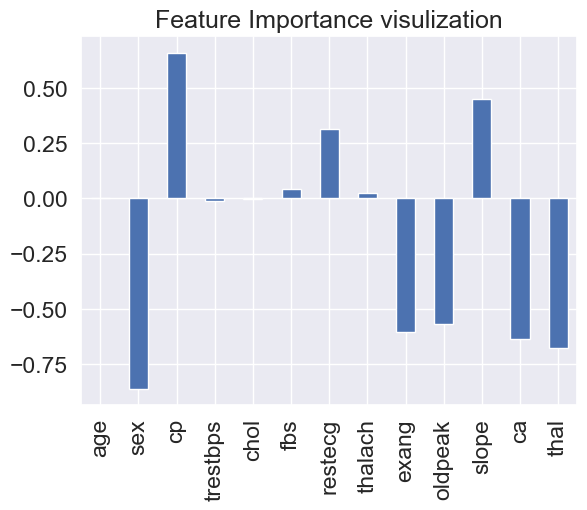

In [89]:
##Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance visulization", legend=False)